In [37]:
import os

import numpy as np
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))


[]


In [38]:
!nvidia-smi

Sat Feb  7 13:43:54 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 591.86                 Driver Version: 591.86         CUDA Version: 13.1     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4060 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   41C    P0             17W /  120W |       0MiB /   8188MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [39]:
import tensorflow as tf
print(tf.__version__)


2.20.0


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

### Load and preprocess Images

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,

    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

### Loading images from folder

In [15]:
train_data = train_datagen.flow_from_directory(
    "./training/",
    target_size=(128, 128),
    batch_size=4,
    class_mode="binary",
    subset="training"
)

val_data = train_datagen.flow_from_directory(
    "./training/",
    target_size=(128, 128),
    batch_size=4,
    class_mode="binary",
    subset="validation"
)

Found 34 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


In [16]:
train_data.class_indices

{'happy': 0, 'not happy': 1}

In [17]:
model = models.Sequential([
    layers.Input(shape=(128, 128, 3)),
    layers.Conv2D(32, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),

    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

### Compile the Model

In [18]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [19]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20
)

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.6176 - loss: 0.7175 - val_accuracy: 0.5000 - val_loss: 0.6597
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5294 - loss: 0.6702 - val_accuracy: 0.8750 - val_loss: 0.5933
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7647 - loss: 0.5261 - val_accuracy: 1.0000 - val_loss: 0.4162
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8824 - loss: 0.3773 - val_accuracy: 0.6250 - val_loss: 0.5193
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7941 - loss: 0.3651 - val_accuracy: 1.0000 - val_loss: 0.0822
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9412 - loss: 0.1816 - val_accuracy: 1.0000 - val_loss: 0.1639
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8529 - loss: 0.2770 - val_accuracy: 1.0000 - val_loss: 0.0453
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 1.0000 - loss: 0.0774 - val_accuracy: 0.8750 - val_loss: 0.2363


In [22]:
import os
dir_path = "./testing/"
for i in os.listdir(dir_path):
    print(i)

happy12.png
happy13.png
happy15.png
happy4.png
happy5.png
happy9.png
sad10.png
sad13.png
sad16.png
sad19.png
sad5.png


In [25]:
import cv2
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

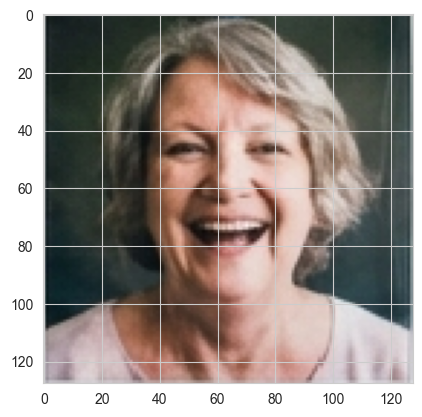

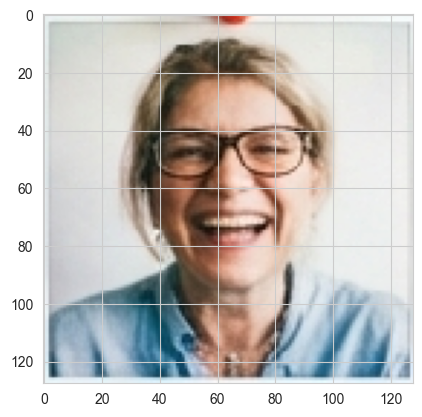

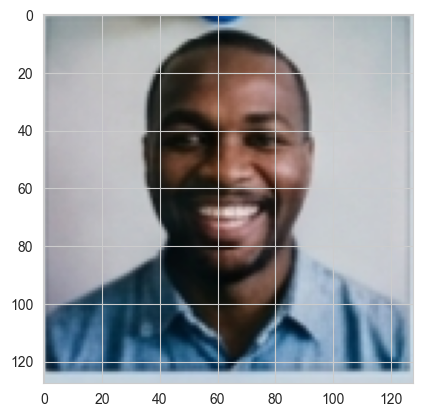

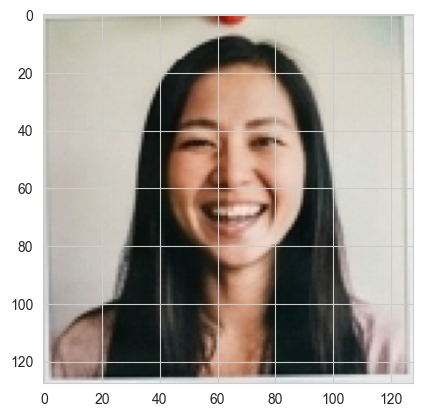

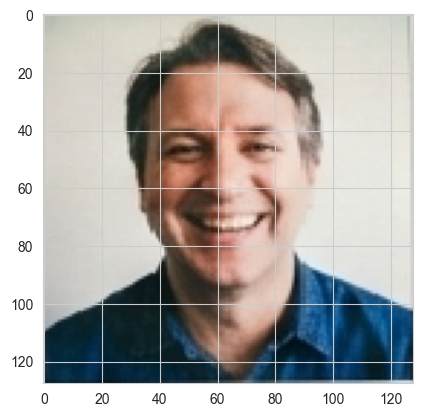

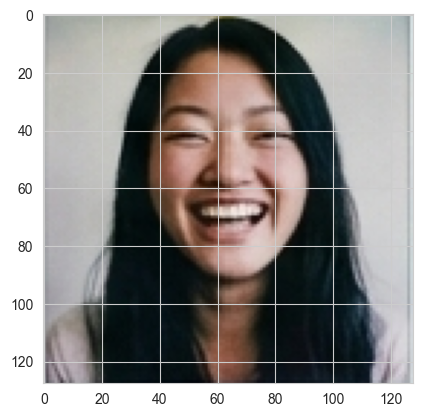

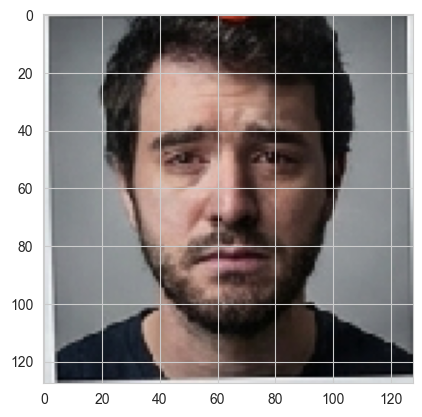

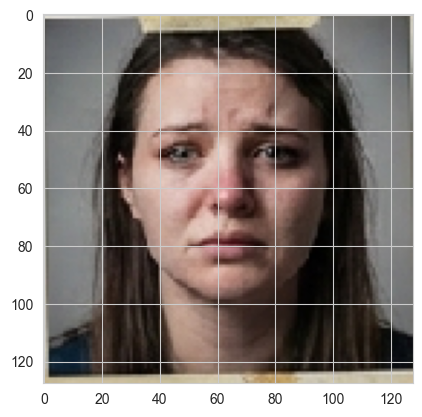

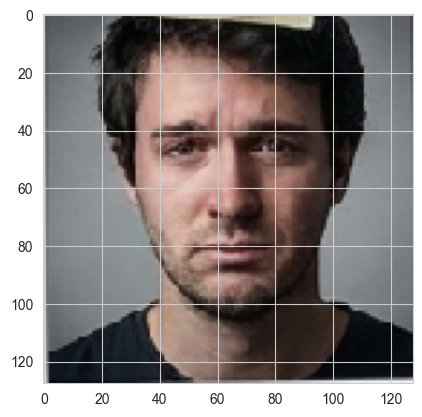

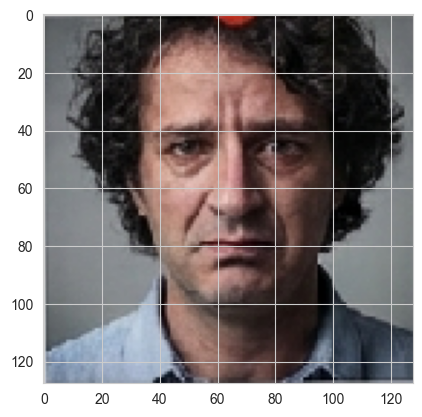

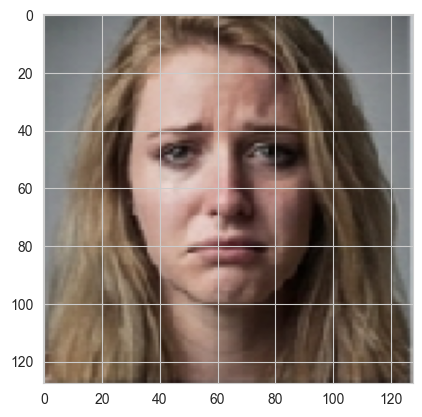

In [27]:
for image_name in os.listdir(dir_path):
    img = image.load_img(dir_path+"//"+image_name, target_size=(128, 128))
    plt.imshow(img)
    plt.show()

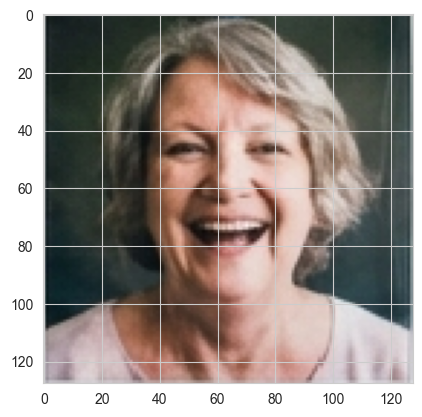

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
This is happy image


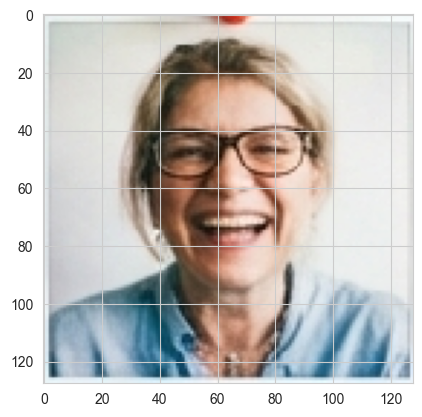

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
This is happy image


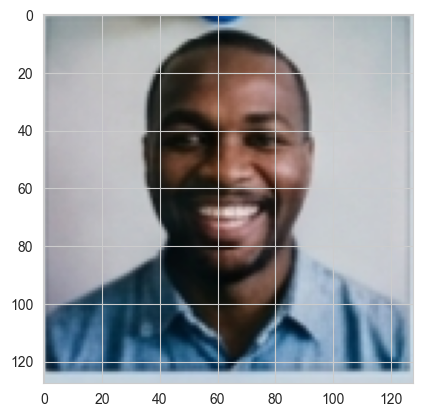

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
This is happy image


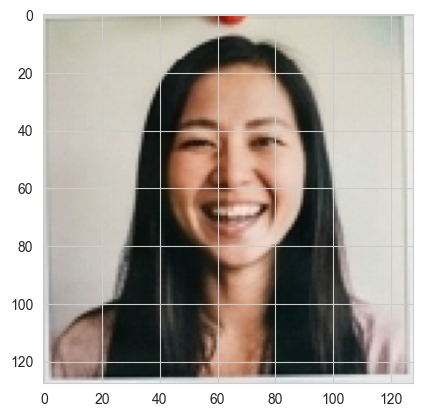

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
This is happy image


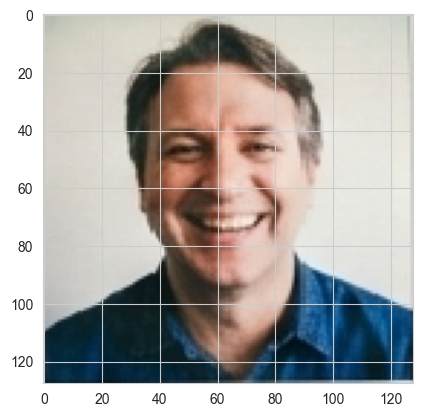

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
This is happy image


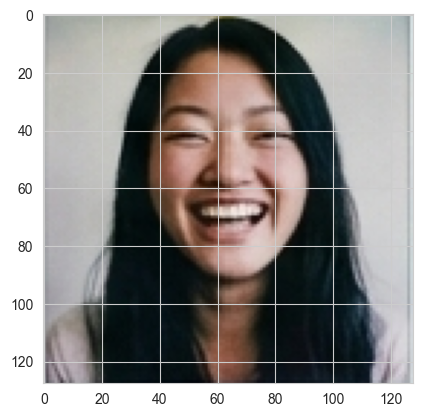

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
This is happy image


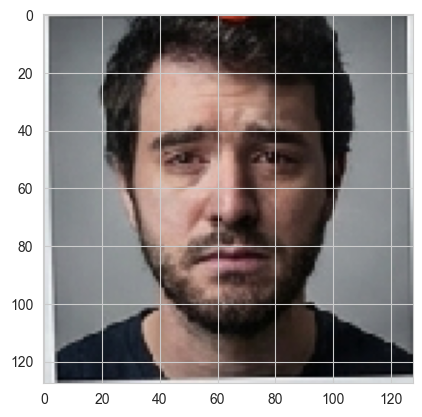

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
This is sad image


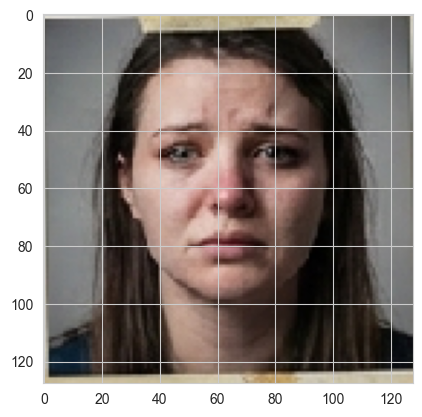

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
This is sad image


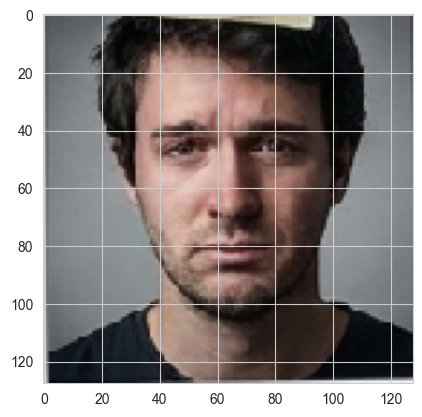

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
This is sad image


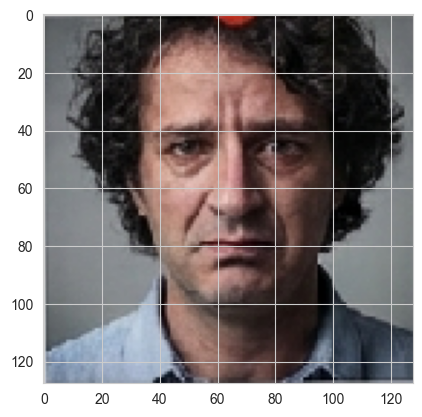

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
This is sad image


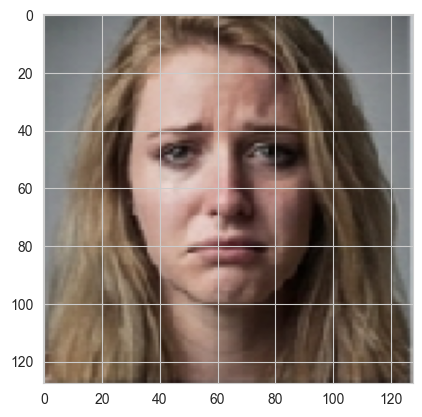

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
This is sad image


In [32]:
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+"//"+i, target_size=(128, 128))
    plt.imshow(img)
    plt.show()

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])

    val = model.predict(images)
    if val == 0:
        print("This is happy image")
    else:
        print("This is sad image")

In [35]:
import gradio as gr
from PIL import Image
import numpy as np

def predict_mood(image):
    # Resize the image to (200, 200) as expected by the model
    img = image.resize((128, 128))
    # Convert the image to a numpy array
    x = np.array(img)
    # Expand dimensions to create a batch of 1 image
    x = np.expand_dims(x, axis=0)
    # Normalize the image (if the model was trained with normalized inputs)
    # The model was trained with rescale=1/200, so we should apply the same scaling here.
    x = x / 255.0
    # Make prediction
    val = model.predict(x)[0][0]
    # Interpret the prediction
    if val < 0.5:
        return 'Happy'
    else:
        return 'Not Happy'

In [36]:
iface = gr.Interface(fn=predict_mood,
                     inputs=gr.Image(type="pil"),
                     outputs=gr.Text(label="Predicted Mood"),
                     title="Mood Classification (Happy/Not Happy)",
                     description = "Upload an image to classify if it's happy or not happy."
                     )
iface.launch()

* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
